In [1]:
import warnings
warnings.filterwarnings("ignore")


import pandas as pd
import seaborn  as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy 
from sklearn.manifold import TSNE
import scipy.stats as stats

sns.set()

In [2]:
class Analysis:

    def __init__(self):
        pass
    

    @staticmethod
    def normalize(df , columns):
        result1 = df.copy()
        for feature_name in columns:
            if (str(feature_name) != str('ID') and str(feature_name)!=str('Class')):
                max_value = df[feature_name].max()
                min_value = df[feature_name].min()
                result1[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
        return result1
    

    @staticmethod
    def get_Tsne_plot(result , val , data_y , type_):


        xtsne=TSNE(perplexity=val)
        result = xtsne.fit_transform(result.drop(['ID'], axis=1))
        vis_x = result[:, 0]
        vis_y = result[:, 1]

        plt.title("T-SNE Dist plot for " + type_)
        plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
        plt.colorbar(ticks=range(10))
        plt.clim(0.5, 9)
        plt.show()

    @staticmethod
    def get_counts(df):

        df_bytes = df.select_dtypes(include='int64').sum(axis = 0)
        df_bytes['Class'] = df['Class'].max()

        return df_bytes

    @staticmethod
    def get_probs(final_df , asm_cols , byte_cols):
        
        if "ID" in asm_cols:
            asm_cols.remove('ID')
        if "ID" in byte_cols:
            byte_cols.remove('ID')

        counts_df = final_df.groupby('Class').apply(Analysis.get_counts)

        byte_counts = counts_df[byte_cols[:]].sum(axis = 1)
        asm_counts = counts_df[asm_cols[:]].sum(axis = 1)

        bytes_probs = counts_df[byte_cols[:]].div(byte_counts.values , axis = 0).T
        asm_probs = counts_df[asm_cols[:]].div(asm_counts.values , axis = 0).T

        return bytes_probs , asm_probs

    @staticmethod
    def compare_dists(df):
        distributions = ['norm','bernoulli']


        fig, axes = plt.subplots(nrows=9, ncols=2, figsize=(10, 30))

        for i, column in enumerate(df.columns):
            for j, distribution in enumerate(distributions):
                ax = axes[i][j]
                if distribution == 'norm':
                    stats.probplot(df[column], dist=distribution, plot=ax)
                    ax.set_title(f'{column} - {distribution.capitalize()}')
                elif distribution == 'bernoulli':
                    # For Bernoulli, generate quantiles for the empirical distribution
                    quantiles = df[column].rank(pct=True)
                    stats.probplot(quantiles, dist='uniform', plot=ax)
                    ax.set_title(f'{column} - Empirical vs Uniform')
                
                ax.grid(True)

        plt.tight_layout()
        plt.show()


In [9]:
image_data = pd.read_csv('imgdf_data.csv')
final_df = pd.read_csv('final_df.csv')

final_df = final_df.merge(image_data , on = "ID" , how = "inner").drop('Unnamed: 0' , axis = 1)

final_df.columns

Index(['ID', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       'pix790', 'pix791', 'pix792', 'pix793', 'pix794', 'pix795', 'pix796',
       'pix797', 'pix798', 'pix799'],
      dtype='object', length=1110)

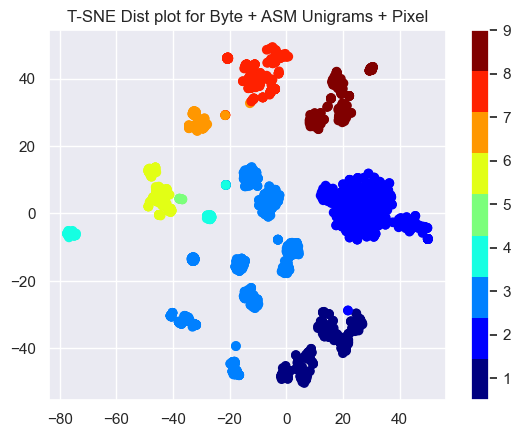

In [12]:
final_df_norm = Analysis.normalize(final_df , final_df.columns)

data_y = final_df.Class
final_df_norm = Analysis.normalize(final_df , final_df.columns)
Analysis.get_Tsne_plot(final_df_norm.fillna(0) , 50 , data_y , "Byte + ASM Unigrams + Pixel")

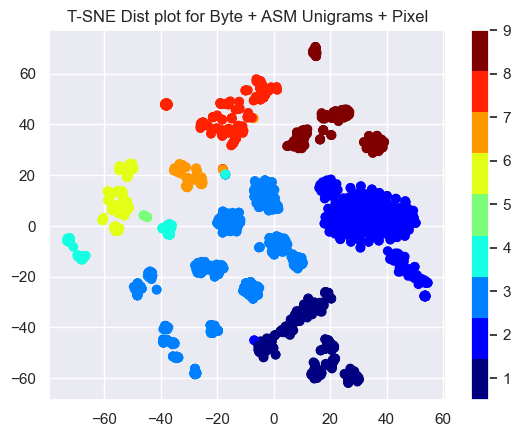

In [13]:
Analysis.get_Tsne_plot(final_df_norm.fillna(0) , 30 , data_y , "Byte + ASM Unigrams + Pixel")

In [14]:
final_df.to_csv("final_df_with_pix.csv" , header= True)